In [1]:
import shutil
import os
import numpy as np
import argparse

In [2]:
import random
import keras

In [3]:
from tensorflow.keras import Sequential

In [4]:
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from numpy import *
from PIL import Image
import theano

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [5]:
path_test="C:\\Users\\Nithin's PC\\"

In [6]:
Categories=["week1","week2","week3"]

In [14]:
training=[]
def createTrainingData():
    for cat in Categories:
        path=os.path.join(path_test,cat)
        class_num=Categories.index(cat)
        for img in os.listdir(path):
            img_array=cv2.imread(os.path.join(path,img))
            new_array=cv2.resize(img_array,(48,48))
            training.append([new_array,class_num])


In [55]:
createTrainingData()

In [56]:
random.shuffle(training)
training=training[:100000]

In [57]:
X=[]
Y=[]
for features,label in training:
    X.append(features)
    Y.append(label)
X=np.array(X).reshape(-1,48,48,3)

In [58]:
print(X)
print(shape(X))

[[[[129 188 169]
   [129 188 169]
   [129 188 169]
   ...
   [101 154 148]
   [101 154 148]
   [101 154 148]]

  [[129 188 169]
   [129 188 169]
   [129 188 169]
   ...
   [101 154 148]
   [101 154 148]
   [101 154 148]]

  [[129 188 169]
   [129 188 169]
   [129 188 169]
   ...
   [101 154 148]
   [101 154 148]
   [101 154 148]]

  ...

  [[ 92 142 129]
   [ 92 142 129]
   [ 92 142 129]
   ...
   [ 79 138 124]
   [ 79 138 124]
   [ 79 138 124]]

  [[ 92 142 129]
   [ 92 142 129]
   [ 92 142 129]
   ...
   [ 79 138 124]
   [ 79 138 124]
   [ 79 138 124]]

  [[ 92 142 129]
   [ 92 142 129]
   [ 92 142 129]
   ...
   [ 79 138 124]
   [ 79 138 124]
   [ 79 138 124]]]


 [[[141 157 138]
   [141 157 138]
   [137 157 136]
   ...
   [ 86 103  94]
   [ 87 103  95]
   [ 87 103  95]]

  [[141 157 138]
   [141 157 138]
   [137 157 135]
   ...
   [ 86 103  93]
   [ 87 103  95]
   [ 87 103  95]]

  [[141 158 138]
   [141 158 138]
   [137 158 135]
   ...
   [ 86 103  92]
   [ 86 103  94]
   [ 86 103

In [59]:
from keras.utils import np_utils
y=np_utils.to_categorical(Y,3)

In [60]:
shape(Y)
Y=np.array(Y)

In [61]:
print(shape(Y))

(100000,)


In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [63]:
  batch_size = 16
nb_classes =4
nb_epochs = 10
img_rows, img_columns = 48, 48
img_channel = 3
nb_filters = 32
nb_pool = 2
nb_conv = 3

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(6, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D((3, 3), strides=3),
    tf.keras.layers.Softmax(),
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.Conv2D(16, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((4, 4), strides=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3,  activation=tf.nn.softmax)
])

In [65]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [66]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=5,verbose=1,validation_data=(X_test,y_test))

Epoch 1/5
5000/5000 [==============================] - 185s 37ms/step - loss: 0.7106 - accuracy: 0.6729 - val_loss: 0.7188 - val_accuracy: 0.6662
Epoch 2/5
5000/5000 [==============================] - 182s 36ms/step - loss: 0.5695 - accuracy: 0.7521 - val_loss: 0.4938 - val_accuracy: 0.7882
Epoch 3/5
5000/5000 [==============================] - 177s 35ms/step - loss: 0.5087 - accuracy: 0.7823 - val_loss: 0.5175 - val_accuracy: 0.7748
Epoch 4/5
5000/5000 [==============================] - 178s 36ms/step - loss: 0.4771 - accuracy: 0.7976 - val_loss: 0.4324 - val_accuracy: 0.8148
Epoch 5/5
5000/5000 [==============================] - 178s 36ms/step - loss: 0.4672 - accuracy: 0.8007 - val_loss: 0.3993 - val_accuracy: 0.8322


In [69]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  0.39928552508354187
Test accuracy:  0.8321999907493591


In [44]:
model.fit(X_train,y_train,batch_size=batch_size,epochs=15,verbose=1,validation_data=(X_test,y_test))

Epoch 1/15
500/500 [==============================] - 17s 34ms/step - loss: 0.6164 - accuracy: 0.7293 - val_loss: 0.5618 - val_accuracy: 0.7650
Epoch 2/15
500/500 [==============================] - 17s 34ms/step - loss: 0.5591 - accuracy: 0.7575 - val_loss: 0.5498 - val_accuracy: 0.7620
Epoch 3/15
500/500 [==============================] - 18s 36ms/step - loss: 0.5681 - accuracy: 0.7575 - val_loss: 0.7858 - val_accuracy: 0.6725
Epoch 4/15
500/500 [==============================] - 18s 36ms/step - loss: 0.5179 - accuracy: 0.7811 - val_loss: 0.5990 - val_accuracy: 0.7455
Epoch 5/15
500/500 [==============================] - 17s 35ms/step - loss: 0.5190 - accuracy: 0.7815 - val_loss: 0.4469 - val_accuracy: 0.8180
Epoch 6/15
500/500 [==============================] - 20s 41ms/step - loss: 0.5265 - accuracy: 0.7751 - val_loss: 0.4420 - val_accuracy: 0.8210
Epoch 7/15
500/500 [==============================] - 20s 39ms/step - loss: 0.5026 - accuracy: 0.7851 - val_loss: 0.4329 - val_accuracy:

In [45]:
score = model.evaluate(X_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  1.1166281700134277
Test accuracy:  0.5504999756813049


### Metrics

In [71]:
y_pred=model.predict(X_test,verbose=0)
#print(y_pred)
print(y_pred)


[[1.6839147e-05 4.6226140e-03 9.9536055e-01]
 [1.7939912e-01 7.5545591e-01 6.5144971e-02]
 [2.4092590e-04 3.3506094e-03 9.9640840e-01]
 ...
 [3.8306591e-01 3.5276264e-01 2.6417145e-01]
 [1.0408364e-03 9.9844909e-01 5.0996488e-04]
 [1.3305731e-03 9.1183913e-01 8.6830243e-02]]


In [73]:
y_predval=[]
for i in y_pred:
    y_predval.append(np.argmax(i))

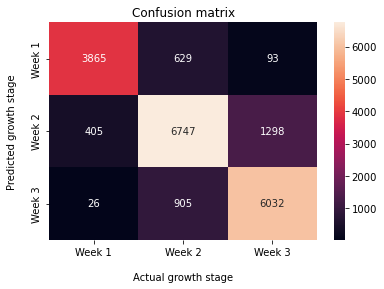

In [88]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predval)
f = sns.heatmap(cm, annot=True, fmt='d')
f.set_title("Confusion matrix")

f.xaxis.set_ticklabels(['Week 1','Week 2','Week 3'])
f.yaxis.set_ticklabels(['Week 1','Week 2','Week 3'])
plt.ylabel("Predicted growth stage",labelpad=15)
plt.xlabel("Actual growth stage",labelpad=15)
plt.show()

### Accuracy

In [93]:
import numpy
import sklearn.metrics
import numpy
import sklearn.metrics

r = sklearn.metrics.confusion_matrix(y_test, y_predval)


tp=r[0][0]+r[1][1]+r[2][2]

acc = tp / numpy.sum(r)
print("Accuracy :")
print(acc)
target_names=["Week 1","Week 2","Week 3"]
precision = sklearn.metrics.classification_report(y_test,y_predval,target_names=target_names)
print(precision)

Accuracy :
0.8322
              precision    recall  f1-score   support

      Week 1       0.90      0.84      0.87      4587
      Week 2       0.81      0.80      0.81      8450
      Week 3       0.81      0.87      0.84      6963

    accuracy                           0.83     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.83      0.83      0.83     20000

